# **Prodigy Task 5**

# **DATASET:**

[https://www.kaggle.com/datasets/dansbecker/food-101](https://www.kaggle.com/datasets/dansbecker/food-101)

**Importing Required Libraries**

In [2]:
import zipfile
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
from PIL import Image

### **Extracting and Displaying Folder Names (Classes)**
This section lists the folder names in the dataset directory, which represent different

In [ ]:
extract_dir = 'D:\\internship\\food\\food-101\\food-101\\images'

# Get the list of folder names (classes) in the extracted directory
folder_names = [folder for folder in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, folder))]

# Display the folder names
print("Extracted folders (classes):")
for folder in folder_names:
    print(folder)

Extracted folders (classes):
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheese_plate
cheesecake
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravio

### **Display Sample Images from Each Folder**

This section plots one image from each food class folder to visualize the data.

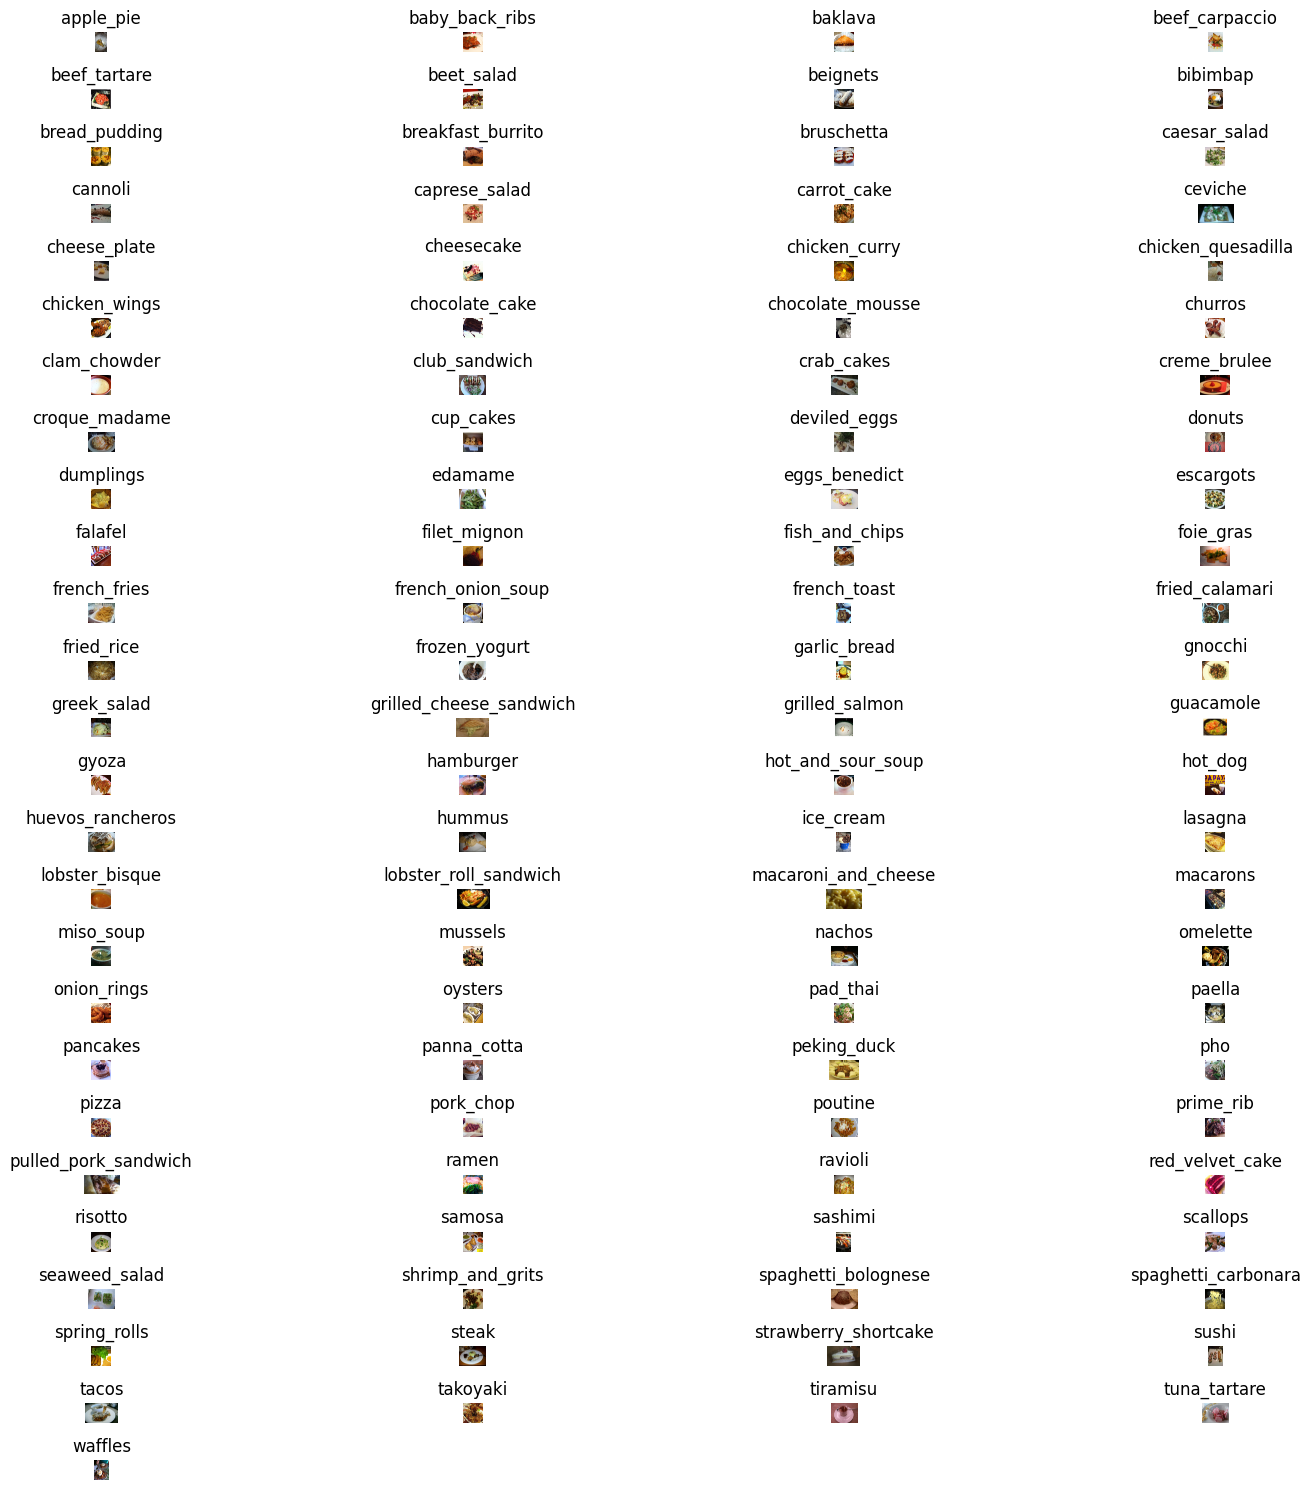

In [ ]:
extract_dir = 'D:\\internship\\food\\food-101\\food-101\\images'

# Get the list of folder names (classes) in the extracted directory
folder_names = [folder for folder in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, folder))]

# Plot one image from each folder
plt.figure(figsize=(15, 15))
for idx, folder in enumerate(folder_names):
    folder_path = os.path.join(extract_dir, folder)
    # Get the list of image files in the current folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # If there are images in the folder, select the first one
    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Display the image
        plt.subplot(len(folder_names) // 4 + 1, 4, idx + 1)
        plt.imshow(image)
        plt.title(folder)
        plt.axis('off')

plt.tight_layout()
plt.show()

### **Counting the Number of Images in Each Class Folder**

his section counts and displays the number of images in each folder, which helps to understand the dataset distribution.

In [ ]:
extract_dir = 'D:\\internship\\food\\food-101\\food-101\\images'

# Get the list of folder names (classes) in the extracted directory
folder_names = [folder for folder in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, folder))]

# Dictionary to store the count of images in each folder
image_counts = {}

# Count the number of images in each folder
for folder in folder_names:
    folder_path = os.path.join(extract_dir, folder)
    # Get the list of image files in the current folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    # Store the count in the dictionary
    image_counts[folder] = len(image_files)

# Display the results
print("Number of images in each folder:")
for folder, count in image_counts.items():
    print(f"{folder}: {count} images")

Number of images in each folder:
apple_pie: 1000 images
baby_back_ribs: 1000 images
baklava: 1000 images
beef_carpaccio: 1000 images
beef_tartare: 1000 images
beet_salad: 1000 images
beignets: 1000 images
bibimbap: 1000 images
bread_pudding: 1000 images
breakfast_burrito: 1000 images
bruschetta: 1000 images
caesar_salad: 1000 images
cannoli: 1000 images
caprese_salad: 1000 images
carrot_cake: 1000 images
ceviche: 1000 images
cheese_plate: 1000 images
cheesecake: 1000 images
chicken_curry: 1000 images
chicken_quesadilla: 1000 images
chicken_wings: 1000 images
chocolate_cake: 1000 images
chocolate_mousse: 1000 images
churros: 1000 images
clam_chowder: 1000 images
club_sandwich: 1000 images
crab_cakes: 1000 images
creme_brulee: 1000 images
croque_madame: 1000 images
cup_cakes: 1000 images
deviled_eggs: 1000 images
donuts: 1000 images
dumplings: 1000 images
edamame: 1000 images
eggs_benedict: 1000 images
escargots: 1000 images
falafel: 1000 images
filet_mignon: 1000 images
fish_and_chips: 

### **Calorie Dictionary Definition**

This section creates a dictionary mapping each food class to its estimated calorie content.

In [ ]:
# A Calorie estimate dictionary
calorie_dict = {
    'apple_pie': 237, 'baby_back_ribs': 350, 'baklava': 540, 'beef_carpaccio': 460, 'beef_tartare': 560,
    'beet_salad': 450, 'beignets': 340, 'bibimbap': 490, 'bread_pudding': 330, 'breakfast_burrito': 305,
    'bruschetta': 180, 'caesar_salad': 220, 'cannoli': 275, 'caprese_salad': 150, 'carrot_cake': 350,
    'ceviche': 200, 'cheese_plate': 400, 'cheesecake': 320, 'chicken_curry': 250, 'chicken_quesadilla': 310,
    'chicken_wings': 290, 'chocolate_cake': 360, 'chocolate_mousse': 340, 'churros': 230, 'clam_chowder': 180,
    'club_sandwich': 315, 'crab_cakes': 280, 'creme_brulee': 330, 'croque_madame': 420, 'cup_cakes': 305,
    'deviled_eggs': 110, 'donuts': 260, 'dumplings': 215, 'edamame': 120, 'eggs_benedict': 340,
    'escargots': 300, 'falafel': 220, 'filet_mignon': 480, 'fish_and_chips': 440, 'foie_gras': 510,
    'french_fries': 350, 'french_onion_soup': 180, 'french_toast': 290, 'fried_calamari': 280,
    'fried_rice': 330, 'frozen_yogurt': 130, 'garlic_bread': 220, 'gnocchi': 250, 'greek_salad': 160,
    'grilled_cheese_sandwich': 320, 'grilled_salmon': 300, 'guacamole': 220, 'gyoza': 180,
    'hamburger': 450, 'hot_and_sour_soup': 120, 'hot_dog': 310, 'huevos_rancheros': 220, 'hummus': 180,
    'ice_cream': 210, 'lasagna': 330, 'lobster_bisque': 270, 'lobster_roll_sandwich': 450,
    'macaroni_and_cheese': 320, 'macarons': 130, 'miso_soup': 70, 'mussels': 150, 'nachos': 350,
    'omelette': 220, 'onion_rings': 290, 'oysters': 110, 'pad_thai': 310, 'paella': 280,
    'pancakes': 240, 'panna_cotta': 330, 'peking_duck': 430, 'pho': 200, 'pizza': 350,
    'pork_chop': 450, 'poutine': 390, 'prime_rib': 500, 'pulled_pork_sandwich': 420, 'ramen': 320,
    'ravioli': 280, 'red_velvet_cake': 370, 'risotto': 320, 'samosa': 180, 'sashimi': 140,
    'scallops': 230, 'seaweed_salad': 50, 'shrimp_and_grits': 310, 'spaghetti_bolognese': 290,
    'spaghetti_carbonara': 370, 'spring_rolls': 100, 'steak': 400, 'strawberry_shortcake': 330,
    'sushi': 200, 'tacos': 240, 'takoyaki': 220, 'tiramisu': 300, 'tuna_tartare': 250, 'waffles': 310
}

### **Loading Images and Labels**

This function loads images from each class folder, resizes them, and assigns a label based on the class index.

In [ ]:
def load_images_and_labels(base_path, max_classes=3):
    images = []
    labels = []
    class_names = []

    # Iterate over each class folder in the base path
    for class_index, class_folder in enumerate(os.listdir(base_path)):
        if class_index >= max_classes:
            break  # Stop loading after the max classes number is reached

        class_folder_path = os.path.join(base_path, class_folder)

        # Check if the class folder is a directory
        if not os.path.isdir(class_folder_path):
            print(f"Skipping {class_folder} as it is not a directory.")
            continue

        # Assign a numeric label based on the class name index
        if class_folder not in class_names:
            class_names.append(class_folder)
        label = class_names.index(class_folder)

        # Load each image in the class folder
        for image_file in tqdm(os.listdir(class_folder_path), desc=f"Loading images from {class_folder}"):
            image_path = os.path.join(class_folder_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (128, 128))
                images.append(image)
                labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(images, dtype='float32') / 255.0  # Normalize pixel values to [0, 1]
    labels = np.array(labels, dtype='int')

    return images, labels, class_names

### **Loading Training and Testing Data**
This section loads images and labels for training and testing datasets

In [ ]:
train_dir = 'D:\\internship\\food\\food-101\\food-101\\images\\train'

# Load images and labels
train_images, train_labels, train_class_names = load_images_and_labels(train_dir)

print(f"Total images loaded: {len(train_images)}")
print(f"Total labels loaded: {len(train_labels)}")
print(f"Total classes loaded: {len(train_class_names)}")

Loading images from baklava: 100%|██████████| 800/800 [00:07<00:00, 109.86it/s]


Total images loaded: 2400
Total labels loaded: 2400
Total classes loaded: 3


In [ ]:
test_dir = 'D:\\internship\\food\\food-101\\food-101\\images\\test'

# Load images and labels
test_images, test_labels, test_class_names = load_images_and_labels(test_dir)

print(f"Total images loaded: {len(test_images)}")
print(f"Total labels loaded: {len(test_labels)}")
print(f"Total classes loaded: {len(test_class_names)}")

Loading images from baklava: 100%|██████████| 200/200 [00:03<00:00, 60.75it/s]

Total images loaded: 600
Total labels loaded: 600
Total classes loaded: 3


In [ ]:
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}, Testing labels shape: {test_labels.shape}")

Training data shape: (2400, 128, 128, 3), Training labels shape: (2400,)
Testing data shape: (600, 128, 128, 3), Testing labels shape: (600,)


### **One-Hot Encoding of Labels**

This section converts the categorical labels to one-hot encoded format for training.

In [ ]:
# One-hot encode the labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=3)

### **Data Augmentation Setup**

This section configures image data augmentation to enhance the training process.

In [ ]:
# Create an instance of ImageDataGenerator for augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
data_augmentation.fit(train_images)

In [ ]:
train_generator = data_augmentation.flow(train_images, train_labels_one_hot, batch_size=16)

In [ ]:
test_data_gen = ImageDataGenerator()
test_generator = test_data_gen.flow(test_images, test_labels_one_hot, batch_size=16)

### **Model Creation Using ResNet50**
This section defines the deep learning model architecture using a pre-trained ResNet50 base.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
model = keras.models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(train_class_names),kernel_regularizer=regularizers.l2(0.001), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, None, None,     │    23,587,712 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 23,797,251 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

### **Model Compilation**
This section compiles the model, specifying the loss function, optimizer, and evaluation metrics.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.9),
    metrics=['accuracy']
)

### **Callbacks Configuration**
This section sets up callbacks to monitor training progress and adjust learning rates.


In [ ]:
# Set up callbacks
model_checkpoint = ModelCheckpoint('best_model_task_5_v4.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-8, verbose=1)

### **Model Training**
This section trains the model on the training data using the specified number of epochs and callbacks.

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stop, model_checkpoint,lr_scheduler]
)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4539 - loss: 1.2305
Epoch 1: val_accuracy improved from -inf to 0.45333, saving model to best_model_task_5_v4.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.4544 - loss: 1.2292 - val_accuracy: 0.4533 - val_loss: 1.0178 - learning_rate: 1.0000e-04
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6873 - loss: 0.7126
Epoch 2: val_accuracy improved from 0.45333 to 0.59667, saving model to best_model_task_5_v4.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.6874 - loss: 0.7123 - val_accuracy: 0.5967 - val_loss: 0.8669 - learning_rate: 1.0000e-04
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7498 - loss: 0.5972
Epoch 3: val_accuracy improved from 0.59667 to 0.78167, saving model to best_model_task_5_v4.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.7499 - loss: 0.5971 - val_accuracy: 0.7817 - val_loss: 0.4924 - learning_rate: 1.0000e-04
Epoch 4/30
15

### **Plotting Training and Validation Metrics**
This section plots the accuracy and loss curves for training and validation datasets over epochs.

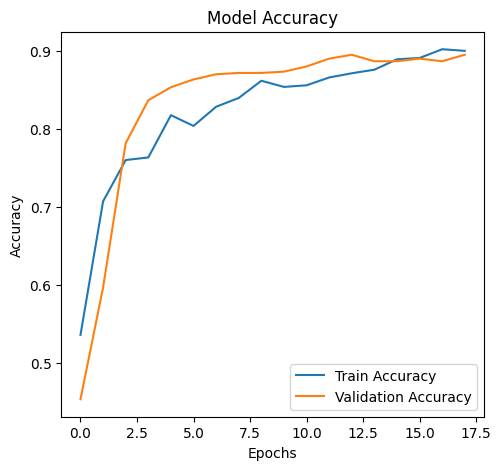

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

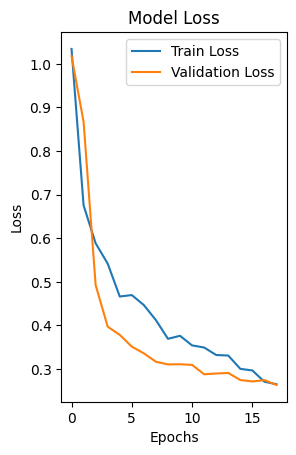

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### **Predicting Calories for a Given Image**
This function predicts the food class and estimated calories for a given input image.

In [ ]:
# Function to predict the calories
def predict_calories(image_path, model, calorie_dict):
    # Preprocess the image (resize to 128x128)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    # Get the class name and corresponding calories
    class_names = list(calorie_dict.keys())
    predicted_class_name = class_names[predicted_class]
    calories = calorie_dict[predicted_class_name]

    return predicted_class_name, calories

### **Example Predictions**
This section provides examples of using the predict_calories function to estimate the class and calories of food images.

In [ ]:
image_path = 'D:\\internship\\food\\food-101\\food-101\\images\\test\\apple_pie\\23893.jpg'
predicted_class, estimated_calories = predict_calories(image_path, model, calorie_dict)
print(f'Predicted Class: {predicted_class}, Estimated Calories: {estimated_calories}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: apple_pie, Estimated Calories: 237


In [ ]:
image_path = 'D:\\internship\\food\\food-101\\food-101\\images\\test\\baklava\\104446.jpg'  # Replace with an actual image path
predicted_class, estimated_calories = predict_calories(image_path, model, calorie_dict)
print(f'Predicted Class: {predicted_class}, Estimated Calories: {estimated_calories}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Class: baklava, Estimated Calories: 540
